In [1]:
# Third Party Imports
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pickle
import time
from pandarallel import pandarallel
from sklearn.model_selection import StratifiedKFold
pandarallel.initialize(progress_bar=False, nb_workers=2)
from exphelperfunctions import abbrv_num
from exphelperfunctions import objectToFile
from exphelperfunctions import objectFromFile
from exphelperfunctions import add_value_labels

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
#Open CICIDS2019
columns = ['Timestamp','Src IP','Dst IP','Protocol','UDP src port','UDP dst port','TCP src port','TCP dst port','TCP flags', 'Frame length','Frame TTL']
dtypes = {'Timestamp':np.int64,'Src IP': str,'Protocol':object,'Dst IP':str,'UDP src port': str,'UDP dst port':str,'TCP src port':np.int32,'TCP dst port':np.int32,'TCP flags':str,'Frame length':np.int32,'Frame TTL':np.int32}
df_feather_path = "/mnt/h/CICIDS/DDoS2019/feather/11-03_feather"
dirpath = "/mnt/h/CICIDS/DDoS2019/pcap_csv/"

filepaths = [dirpath+f for f in os.listdir(dirpath) if (f.endswith('.csv') and f.startswith('SAT-03'))]

print("Importing data")
#df = pd.read_feather(df_feather_path)

concat_list = list()
iter = 0
df = pd.read_csv(filepaths[0], sep=',',names=columns, skipinitialspace=True)
for filename in filepaths[1:]:
   iter += 1
   print("Loading: " + filename)
   concat_list.append(pd.read_csv(filename, sep=',',names=columns, skipinitialspace=True))
   if iter % 100 == 0:
       concat_list.append(df)
       df = pd.concat(concat_list,ignore_index=True)
       concat_list = list()
        
concat_list.append(df)
df = pd.concat(concat_list,ignore_index=True)
concat_list = list()

Importing data
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0101_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0102_out.csv


/home/arjen/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0103_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0104_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0105_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0106_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0107_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0108_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0109_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_010_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0110_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0111_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0112_out.csv


/home/arjen/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0113_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0114_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0115_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0116_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0117_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0118_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0119_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_011_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0120_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0121_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0122_out.csv


/home/arjen/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0123_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0124_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0125_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0126_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0127_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0128_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0129_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_012_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0130_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0131_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0132_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0133_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0134_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pcap_csv/SAT-03-11-2018_0135_out.csv
Loading: /mnt/h/CICIDS/DDoS2019/pca

In [4]:
df.head()

,Timestamp,Src IP,Dst IP,Protocol,UDP src port,UDP dst port,TCP src port,TCP dst port,TCP flags,Frame length,Frame TTL
0,1.541252e+09,172.16.0.5,192.168.50.4,17,NaN,NaN,NaN,NaN,NaN,1500.0,117.0
1,1.541252e+09,172.16.0.5,192.168.50.4,17,NaN,NaN,NaN,NaN,NaN,1500.0,117.0
2,1.541252e+09,172.16.0.5,192.168.50.4,17,801,32683.0,NaN,NaN,NaN,1239.0,117.0
3,1.541252e+09,172.16.0.5,192.168.50.4,17,NaN,NaN,NaN,NaN,NaN,1239.0,117.0
4,1.541252e+09,172.16.0.5,192.168.50.4,17,NaN,NaN,NaN,NaN,NaN,1500.0,112.0


# Below fixes original tshark output .csv file to its current feathered state
## 1. Fix timestamp

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True, unit='s')
df['Timestamp'] = df['Timestamp'].dt.tz_convert(tz='Etc/GMT+3')

In [6]:
df.sort_values('Timestamp', inplace=True, ignore_index=True)
df.head()

,Timestamp,Src IP,Dst IP,Protocol,UDP src port,UDP dst port,TCP src port,TCP dst port,TCP flags,Frame length,Frame TTL
0,2018-11-03 09:18:16.583626032-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-03 09:18:16.964447021-03:00,192.168.50.254,224.0.0.5,89,NaN,NaN,NaN,NaN,NaN,80.0,1.0
2,2018-11-03 09:18:16.964453220-03:00,192.168.50.254,224.0.0.5,89,NaN,NaN,NaN,NaN,NaN,80.0,1.0
3,2018-11-03 09:18:16.964455128-03:00,192.168.50.254,224.0.0.5,89,NaN,NaN,NaN,NaN,NaN,80.0,1.0
4,2018-11-03 09:18:18.506536961-03:00,192.168.50.253,224.0.0.5,89,NaN,NaN,NaN,NaN,NaN,80.0,1.0


## 2. Remove bulk information per attack to reduce df size

In [7]:
pm_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=9,minute=43)
pm_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=9,minute=51)
pm_slice_ts = pm_start_ts + (pm_end_ts-pm_start_ts)/2

nb_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=0)
nb_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=9)
nb_slice_ts = nb_start_ts + (nb_end_ts-nb_start_ts)/2

ldap_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=21)
ldap_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=30)
ldap_slice_ts = ldap_start_ts + (ldap_end_ts-ldap_start_ts)/2

mssql_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=33)
mssql_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=42)
mssql_slice_ts = mssql_start_ts + (mssql_end_ts-mssql_start_ts)/2

udp_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=10,minute=53)
udp_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=11,minute=3)
udp_slice_ts = udp_start_ts + (udp_end_ts-udp_start_ts)/2

udplag_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=11,minute=14)
udplag_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=11,minute=24)
udplag_slice_ts = udplag_start_ts + (udplag_end_ts-udplag_start_ts)/2 

syn_start_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=11,minute=28)
syn_end_ts = pd.Timestamp(tz='Etc/GMT+3',year=2018,month=11,day=3,hour=17,minute=35)
syn_slice_ts = syn_start_ts + (syn_end_ts-syn_start_ts)/2

#print(len(df[(df['Timestamp'] > pm_slice_ts) & (df['Timestamp'] <= pm_end_ts)].index))
print(df.shape)
df.drop(df[(df['Timestamp'] > pm_slice_ts) & (df['Timestamp'] <= pm_end_ts)].index, inplace=True)
df.drop(df[(df['Timestamp'] > nb_slice_ts) & (df['Timestamp'] <= nb_end_ts)].index, inplace=True)
df.drop(df[(df['Timestamp'] > ldap_slice_ts) & (df['Timestamp'] <= ldap_end_ts)].index, inplace=True)
df.drop(df[(df['Timestamp'] > mssql_slice_ts) & (df['Timestamp'] <= mssql_end_ts)].index, inplace=True)
df.drop(df[(df['Timestamp'] > udp_slice_ts) & (df['Timestamp'] <= udp_end_ts)].index, inplace=True)
df.drop(df[(df['Timestamp'] > udplag_slice_ts) & (df['Timestamp'] <= udplag_end_ts)].index, inplace=True)
df.drop(df[(df['Timestamp'] > syn_slice_ts) & (df['Timestamp'] <= syn_end_ts)].index, inplace=True)
print(df.shape)

(61407883, 11)
(39751010, 11)


## 3. Fix protocol column

In [8]:
print(df['Protocol'].unique())
df.drop(df[(df['Protocol'] == '192.168.50.4') \
           | (df['Protocol'] == '172.16.0.5') \
           | (df['Protocol'] == '192.225.158.2') \
           | (df['Protocol'].isna())].index, inplace=True)
df['Protocol'] = df['Protocol'].astype(int)
df.drop(df[df['Protocol'] == 89].index, inplace=True)
print(df['Protocol'].unique())

[nan '89' '6' '17' '1' '192.168.50.4' '172.16.0.5' '2' 17 89 1 6.0
 '192.225.158.2' 2.0]
[ 6 17  1  2]


In [9]:
df['Protocol'] = df['Protocol'].astype(str)
descriptive_dict = {'1': 'ICMP', '2': 'IGMP', '6': 'TCP', '17': 'UDP'}
df['Protocol'] = df['Protocol'].map(descriptive_dict)
print(df.head(1))

                            Timestamp        Src IP         Dst IP Protocol  \
9 2018-11-03 09:18:18.610575914-03:00  192.168.50.6  172.217.10.98      TCP   

  UDP src port  UDP dst port  TCP src port  TCP dst port   TCP flags  \
9          NaN           NaN       54799.0         443.0  0x00000018   

   Frame length  Frame TTL  
9          86.0      128.0  


In [10]:
print(df['Protocol'].unique())

['TCP' 'UDP' 'ICMP' 'IGMP']


## 4. Combine port columns

In [11]:
print(df[['UDP src port', 'TCP src port']].head(10)) 
print(df.iloc[-1])
df['Src Port'] = df['UDP src port'].combine_first(df['TCP src port'])
df['Dst Port'] = df['UDP dst port'].combine_first(df['TCP dst port'])

   UDP src port  TCP src port
9           NaN       54799.0
10          NaN       54799.0
11          NaN       54800.0
12          NaN       54800.0
13          NaN       54801.0
14          NaN       54801.0
15          NaN       54805.0
16          NaN       54805.0
17          NaN         443.0
18          NaN         443.0
Timestamp       2018-11-03 17:36:56.349320889-03:00
Src IP                                   172.16.0.5
Dst IP                                 192.168.50.4
Protocol                                       ICMP
UDP src port                                    NaN
UDP dst port                                    NaN
TCP src port                                    NaN
TCP dst port                                    NaN
TCP flags                                       NaN
Frame length                                     58
Frame TTL                                        54
Name: 61407882, dtype: object


In [12]:
df.drop(['UDP src port','UDP dst port','TCP src port','TCP dst port'], inplace=True, axis=1)

In [13]:
df.reset_index(inplace=True)
df['Frame length'] = df['Frame length'].astype(int)
df['Frame TTL'] = df['Frame TTL'].astype(int)
df['Src Port'] = df['Src Port'].astype(str)
df['Dst Port'] = df['Dst Port'].astype(str)
df.head()

,index,Timestamp,Src IP,Dst IP,Protocol,TCP flags,Frame length,Frame TTL,Src Port,Dst Port
0,9,2018-11-03 09:18:18.610575914-03:00,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54799.0,443.0
1,10,2018-11-03 09:18:18.610577822-03:00,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54799.0,443.0
2,11,2018-11-03 09:18:18.610578775-03:00,192.168.50.6,172.217.7.2,TCP,0x00000018,86,128,54800.0,443.0
3,12,2018-11-03 09:18:18.610579729-03:00,192.168.50.6,172.217.7.2,TCP,0x00000018,86,128,54800.0,443.0
4,13,2018-11-03 09:18:18.610581160-03:00,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54801.0,443.0


In [14]:
df['Timestamp'] = df['Timestamp'].dt.tz_localize(None)
df['Src Port'].replace([np.nan,np.inf,-np.inf, 'nan'], 0, inplace=True)
df['Dst Port'].replace([np.nan,np.inf,-np.inf, 'nan'], 0, inplace=True)
df['Src Port'] = (df['Src Port'].astype(float).astype(int))
df['Dst Port'] = (df['Dst Port'].astype(float).astype(int))
df.drop(['index'], axis=1, inplace=True)

In [15]:
print(df.shape)
df.head()

(39671886, 9)


,Timestamp,Src IP,Dst IP,Protocol,TCP flags,Frame length,Frame TTL,Src Port,Dst Port
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54799,443
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54799,443
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,0x00000018,86,128,54800,443
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,0x00000018,86,128,54800,443
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54801,443


In [4]:
df_feather_path = "/mnt/h/CICIDS/DDoS2019/feather/11-03_feather"
#df.to_feather(df_feather_path+'_prelabel')
df = pd.read_feather(df_feather_path+'_prelabel')

## 5. Open CICIDS2019 flow dataset to construct flow_dict

In [16]:
#Open CICIDS2019 test
columns = ['Flow ID','Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Timestamp', 'Flow Duration','Label']
columns2 = ['Flow ID', 'Timestamp', 'Flow Duration','Total Fwd Packets', 'Total Backward Packets']
dtypes = {'Flow ID': str, 'Source IP': str, 'Source Port': int, 'Destination IP': str, 'Destination Port': int,'Label':object}

dirpath_test = "/mnt/h/CICIDS/DDoS2019/test/"

filepaths_test = [dirpath_test+f for f in os.listdir(dirpath_test) if f.endswith('.csv')]

print("Importing testing data")
df_test = pd.read_csv(filepaths_test[0] ,sep=',',header=0, usecols=columns2, dtype= dtypes, parse_dates=['Timestamp'], skipinitialspace=True)
for filename in filepaths_test[1:]:
    print("Concatenating: " + filename)
    df_test = pd.concat([df_test,pd.read_csv(filename, sep=',',header=0, usecols=columns2, dtype= dtypes,  parse_dates=['Timestamp'], skipinitialspace=True)],ignore_index=True)
    
df_test.sort_values('Timestamp',inplace=True)
df_test['BinLabel'] = np.where(df_test['Label'] == 'BENIGN', 'Benign','Malicious')

Importing testing data
Concatenating: /mnt/h/CICIDS/DDoS2019/test/MSSQL.csv
Concatenating: /mnt/h/CICIDS/DDoS2019/test/NetBIOS.csv
Concatenating: /mnt/h/CICIDS/DDoS2019/test/Portmap.csv
Concatenating: /mnt/h/CICIDS/DDoS2019/test/Syn.csv
Concatenating: /mnt/h/CICIDS/DDoS2019/test/UDP.csv
Concatenating: /mnt/h/CICIDS/DDoS2019/test/UDPLag.csv


### Construct label flow_dict and save to file

In [ ]:
#Make dict of flow df for faster search
flow_dict = dict()
start_time = time.time()
for idx, row in df_test.iterrows():
    row_ts = row['Timestamp']
    row_end_ts = row_ts + pd.Timedelta(row['Flow Duration'],unit='us')
    
    val = flow_dict.get(row['Flow ID'], list())
    val.append([(row_ts,row_end_ts), row['Label']])
    flow_dict[row['Flow ID']] = val

print("Wall time: ", (time.time()-start_time))
objectToFile(flow_dict, 'ddos2019_packetsmulti_flowdict')

### Or load label flow_dict from file

In [5]:
flow_dict = objectFromFile("ddos2019_packets_flowdict")

### Execute labelling procedure using flow_dict and packet df

In [6]:
#Use this function to add label data to df from dict version of flow dataset
#Each row in flow_dict is dict{flowID} = [[(start_ts, end_ts), label],...]
#Due to timestamp / duration errors in the df_test dataset, a set of packets cannot be labeled correctly.
def addLabelFromFlow(row):
    #construct flow ID
    prot = 6 if row['Protocol'] == "TCP" else (17 if row['Protocol'] == "UDP" else 0)
    flowID1 = "{0}-{1}-{2}-{3}-{4}".format(row['Src IP'],row['Dst IP'],row['Src Port'],row['Dst Port'],prot)
    flowID2 = "{0}-{1}-{2}-{3}-{4}".format(row['Dst IP'],row['Src IP'],row['Dst Port'],row['Src Port'],prot)
    
    for flowID in [flowID1, flowID2]:
        flows = flow_dict.get(flowID, None)
        if flows == None:
            continue
        for flow in flows:
            start_ts, end_ts = flow[0]
            row_ts = row['Timestamp']
            if row_ts.nanosecond >= 500: #Fix rounding of flow dataset
                row_ts = row_ts.replace(microsecond = row_ts.microsecond+1)
            row_ts = row_ts.replace(nanosecond=0)
            if row_ts >= start_ts and row_ts <= end_ts:
                return flow[1] #Return label
    
    print("No flowID match found for packet index: ", row.name)
    return "-1"

In [1]:
%time b = df.apply(lambda row: addLabelFromFlow(row), axis=1)
objectToFile(b, "ddos2019_labels")

In [8]:
df['BinLabel'] = b

## 6. Load packet labels here

In [11]:
df['Label'] = objectFromFile("ddos2019_multilabels")
#df['BinLabel'] = objectFromFile("ddos2019_labels")

In [9]:
df.head()

,Timestamp,Src IP,Dst IP,Protocol,TCP flags,Frame length,Frame TTL,Src Port,Dst Port,BinLabel
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54799,443,Benign
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54799,443,Benign
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,0x00000018,86,128,54800,443,Benign
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,0x00000018,86,128,54800,443,Benign
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,0x00000018,86,128,54801,443,Benign


In [12]:
print(df['BinLabel'].value_counts())
print(df['Label'].value_counts())

Malicious    35052127
-1            3894931
Benign         724828
Name: BinLabel, dtype: int64
Syn        17303910
UDP         7543949
MSSQL       6450842
NetBIOS     3026287
BENIGN       724828
Portmap      378210
LDAP         345151
UDPLag         3778
Name: Label, dtype: int64


### Drop mislabelled rows

In [13]:
#Drop mislabeled rows
df.drop(df.loc[df['BinLabel'] == "-1"].index, inplace=True)
print(df['BinLabel'].value_counts())
print(df['Label'].value_counts())

Malicious    35052127
Benign         724828
Name: BinLabel, dtype: int64
Syn        17303877
UDP         7389961
MSSQL       3060562
NetBIOS     3026271
BENIGN       693510
Portmap      378210
LDAP          25976
UDPLag         3778
Name: Label, dtype: int64


In [14]:
df.drop(['Label'], inplace=True,axis=1)

## 7. One-hot encode TCP flags into their own column features

In [15]:
df['TCP flags'].replace([np.nan,np.inf,-np.inf, 'nan', None, 'None', 0], '0x00000000', inplace=True)
print(df.loc[(df['Protocol'] == 'UDP')].iloc[0])
df['TCP flags'] = df['TCP flags'].apply(int, base=16)
print(df['TCP flags'].dtype)
#df['TCP flags'] = df['TCP flags'].astype(str)

Timestamp       2018-11-03 09:18:18.758942127
Src IP                                0.0.0.0
Dst IP                        255.255.255.255
Protocol                                  UDP
TCP flags                          0x00000000
Frame length                              328
Frame TTL                                 128
Src Port                                   68
Dst Port                                   67
BinLabel                               Benign
Name: 24, dtype: object
int64


In [16]:
#One hot encode TCP flags
df['TCP_NS'] = np.where(df['TCP flags'] >= 0x100, 1, 0)
df['TCP_CWR'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100) >= 0x80, 1, 0)
df['TCP_ECE'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80) >= 0x40, 1, 0)
df['TCP_URG'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80 - df['TCP_ECE']*0x40) >= 0x20, 1, 0)
df['TCP_ACK'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80 - df['TCP_ECE']*0x40 - \
                          df['TCP_URG']*0x20) >= 0x10, 1, 0)
df['TCP_PSH'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80 - df['TCP_ECE']*0x40 - \
                          df['TCP_URG']*0x20 - df['TCP_ACK']*0x10) >= 0x08, 1, 0)
df['TCP_RST'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80 - df['TCP_ECE']*0x40 - \
                          df['TCP_URG']*0x20 - df['TCP_ACK']*0x10 - df['TCP_PSH']*0x08) >= 0x04, 1, 0)
df['TCP_SYN'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80 - df['TCP_ECE']*0x40 - \
                          df['TCP_URG']*0x20 - df['TCP_ACK']*0x10 - df['TCP_PSH']*0x08 - df['TCP_RST']*0x04) >= 0x02, 1, 0)
df['TCP_FIN'] = np.where((df['TCP flags'] - df['TCP_NS']*0x100 - df['TCP_CWR']*0x80 - df['TCP_ECE']*0x40 - \
                          df['TCP_URG']*0x20 - df['TCP_ACK']*0x10 - df['TCP_PSH']*0x08 - df['TCP_RST']*0x04 - \
                         df['TCP_SYN']*0x02) >= 0x01, 1, 0)

In [17]:
df.drop('TCP flags', axis=1, inplace=True)

In [18]:
df.reset_index(drop=True,inplace=True)
df.head()

,Timestamp,Src IP,Dst IP,Protocol,Frame length,Frame TTL,Src Port,Dst Port,BinLabel,TCP_NS,TCP_CWR,TCP_ECE,TCP_URG,TCP_ACK,TCP_PSH,TCP_RST,TCP_SYN,TCP_FIN
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,0,0,0,1,1,0,0,0
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,0,0,0,1,1,0,0,0
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,0,0,0,1,1,0,0,0
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,0,0,0,1,1,0,0,0
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,86,128,54801,443,Benign,0,0,0,0,1,1,0,0,0


## 7. Save dataframe to file again

In [19]:
df.to_feather(df_feather_path+'_oheflags')

In [7]:
df = pd.read_feather(df_feather_path+'_oheflags')

# Build categories of packet-level data

In [8]:
df.head()

,Timestamp,Src IP,Dst IP,Protocol,Frame length,Frame TTL,Src Port,Dst Port,BinLabel,TCP_NS,TCP_CWR,TCP_ECE,TCP_URG,TCP_ACK,TCP_PSH,TCP_RST,TCP_SYN,TCP_FIN
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,0,0,0,1,1,0,0,0
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,0,0,0,1,1,0,0,0
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,0,0,0,1,1,0,0,0
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,0,0,0,1,1,0,0,0
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,86,128,54801,443,Benign,0,0,0,0,1,1,0,0,0


## 1. Explore interesting features and discretize them

In [25]:
pivot_df = df.pivot(columns='BinLabel')
pivot_df.head()

Timestamp                  Src IP            \
BinLabel                        Benign Malicious        Benign Malicious   
0        2018-11-03 09:18:18.610575914       NaT  192.168.50.6       NaN   
1        2018-11-03 09:18:18.610577822       NaT  192.168.50.6       NaN   
2        2018-11-03 09:18:18.610578775       NaT  192.168.50.6       NaN   
3        2018-11-03 09:18:18.610579729       NaT  192.168.50.6       NaN   
4        2018-11-03 09:18:18.610581160       NaT  192.168.50.6       NaN   

                 Dst IP           Protocol           Frame length            \
BinLabel         Benign Malicious   Benign Malicious       Benign Malicious   
0         172.217.10.98       NaN      TCP       NaN         86.0       NaN   
1         172.217.10.98       NaN      TCP       NaN         86.0       NaN   
2           172.217.7.2       NaN      TCP       NaN         86.0       NaN   
3           172.217.7.2       NaN      TCP       NaN         86.0       NaN   
4         172.217.10.98       NaN      TCP       NaN         86.0       NaN   

          ... TCP_ACK           TCP_PSH           TCP_RST           TCP_SYN  \
BinLabel  ...  Benign Malicious  Benign Malicious  Benign Malicious  Benign   
0         ...     1.0       NaN     1.0       NaN     0.0       NaN     0.0   
1         ...     1.0       NaN     1.0       NaN     0.0       NaN     0.0   
2         ...     1.0       NaN     1.0       NaN     0.0       NaN     0.0   
3         ...     1.0       NaN     1.0       NaN     0.0       NaN     0.0   
4         ...     1.0       NaN     1.0       NaN     0.0       NaN     0.0   

                   TCP_FIN            
BinLabel Malicious  Benign Malicious  
0              NaN     0.0       NaN  
1              NaN     0.0       NaN  
2              NaN     0.0       NaN  
3              NaN     0.0       NaN  
4              NaN     0.0       NaN  

[5 rows x 34 columns]

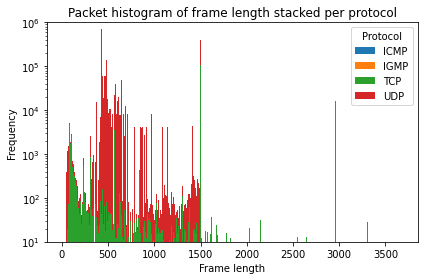

In [22]:
plt.close()
ax = pivot_df['Frame length'].plot.hist(bins=(df['Frame length'].max()), ylim=(0,100000), logy=True, stacked=True)
plt.xlabel('Frame length')
plt.ylim((10, 10**6))
plt.title('Packet histogram of frame length stacked per protocol')
plt.tight_layout()
plt.savefig('ddos2019_packet_hist_framelength.png',bbox_inches='tight')
plt.show()

/home/arjen/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(self.ylim)


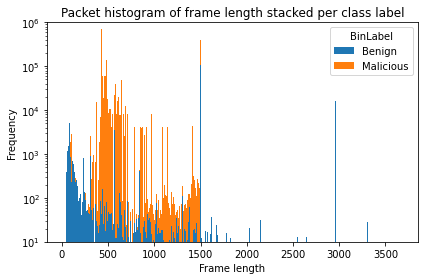

In [26]:
ax = pivot_df['Frame length'].plot.hist(bins=(df['Frame length'].max()), ylim=(0,100000), logy=True, stacked=True)
plt.xlabel('Frame length')
plt.ylim((10, 10**6))
plt.title('Packet histogram of frame length stacked per class label')
plt.tight_layout()
plt.savefig('ddos2019_packet_hist_framelength_class.png',bbox_inches='tight')
plt.show()

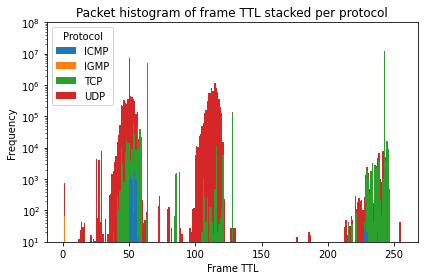

In [24]:
pivot_df['Frame TTL'].plot.hist(bins=(df['Frame TTL'].max()), ylim=(0,100000000), logy=True, stacked=True)
plt.xlabel('Frame TTL')
plt.ylim((10, 10**8))
plt.title('Packet histogram of frame TTL stacked per protocol')
plt.tight_layout()
plt.savefig('ddos2019_packet_hist_framettl.png',bbox_inches='tight')
plt.show()

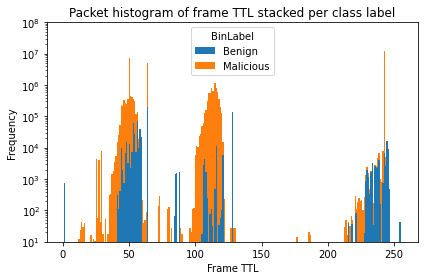

In [27]:
pivot_df['Frame TTL'].plot.hist(bins=(df['Frame TTL'].max()), ylim=(0,100000000), logy=True, stacked=True)
plt.xlabel('Frame TTL')
plt.ylim((10, 10**8))
plt.title('Packet histogram of frame TTL stacked per class label')
plt.tight_layout()
plt.savefig('ddos2019_packet_hist_framettl_class.png',bbox_inches='tight')
plt.show()

In [32]:
mean_fsize = pivot_df['Frame length'].mean()
mean_fttl = pivot_df['Frame TTL'].mean()
print("Average frame size: " + str(mean_fsize) + "\n")
print("Average frame TTL: " + str(mean_fttl))

Average frame size: Protocol
ICMP     58.023929
IGMP     42.000000
TCP      60.922361
UDP     451.086644
dtype: float64

Average frame TTL: Protocol
ICMP     61.666515
IGMP      1.000000
TCP     190.037132
UDP      75.978113
dtype: float64


## 2. Decide on quantiles for binning and discretize features

In [10]:
quantiles_ttl = dict()
quantiles_size = dict()
for prot in df['Protocol'].unique():
    quants = df[df['Protocol'] == prot][['Frame length','Frame TTL']].quantile([1/3,2/3])
    quantiles_ttl[prot] = quants['Frame TTL'].array
    quantiles_size[prot] = quants['Frame length'].array
    
#use mean for TCP TTL (2 bins), use 1/3 2/3 quantile for rest TTL (3 bins)
#size: more than 2/3 of TCP numbers is <= 40, so just use 2 bins
#      also do same for ICMP (<= 58) and IGMP (<= 40)
quantiles_ttl['TCP'] = [df.where(df['Protocol'] == 'TCP')['Frame TTL'].mean()]
quantiles_size['TCP'] = [40]
quantiles_size['ICMP'] = [58]
quantiles_size['IGMP'] = [40]

In [6]:
def valueToBin(val, quantiles):
    for i, q in enumerate(quantiles):
        if val <= q:
            return i
    return len(quantiles)

In [7]:
print(quantiles_ttl)
df['d_ttl'] = df.parallel_apply(lambda row: valueToBin(row['Frame TTL'], quantiles_ttl[row['Protocol']]), axis=1)

{'TCP': [190.03713191732373], 'UDP': <PandasArray>
[50.0, 110.0]
Length: 2, dtype: float64, 'ICMP': <PandasArray>
[54.0, 64.0]
Length: 2, dtype: float64, 'IGMP': <PandasArray>
[1.0, 1.0]
Length: 2, dtype: float64}


In [13]:
print(quantiles_size)
df['d_size'] = df.parallel_apply(lambda row: valueToBin(row['Frame length'], quantiles_size[row['Protocol']]), axis=1)

{'TCP': [40], 'UDP': <PandasArray>
[358.0, 448.0]
Length: 2, dtype: float64, 'ICMP': [58], 'IGMP': [40]}


In [14]:
df.head()

,Timestamp,Src IP,Dst IP,Protocol,Frame length,Frame TTL,Src Port,Dst Port,BinLabel,TCP_NS,...,TCP_ECE,TCP_URG,TCP_ACK,TCP_PSH,TCP_RST,TCP_SYN,TCP_FIN,Label,d_ttl,d_size
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,86,128,54801,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1


## 3. Save dataframe to file again

In [15]:
df.to_feather(df_feather_path)

# Construct category bins and compare results

In [10]:
df.head()

,Timestamp,Src IP,Dst IP,Protocol,Frame length,Frame TTL,Src Port,Dst Port,BinLabel,TCP_NS,...,TCP_ECE,TCP_URG,TCP_ACK,TCP_PSH,TCP_RST,TCP_SYN,TCP_FIN,Label,d_ttl,d_size
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,86,128,54801,443,Benign,0,...,0,0,1,1,0,0,0,BENIGN,0,1


In [5]:
#df['bigram_prot_ttl'] = df.parallel_apply(lambda row: '{}-{}'.format(row['Protocol'],row['d_ttl']), axis=1)
#df['bigram_prot_size'] = df.parallel_apply(lambda row: '{}-{}'.format(row['Protocol'],row['d_size']), axis=1)
#df['trigram_prot_ttl_size'] = df.parallel_apply(lambda row: '{}-{}-{}'.format(row['Protocol'],row['d_ttl'],row['d_size']), axis=1)

def flagsToGram(row):
    #Check SYN, ACK, FIN flags (maybe URG PSH RST? too many though)
    gramflags = ['SYN','ACK','FIN']
    gramstring = ''
    for i, flag in enumerate([row['TCP_SYN'],row['TCP_ACK'],row['TCP_FIN']]):
        if flag:
            if gramstring == '':
                gramstring += gramflags[i]
            else:
                gramstring += ('-' + gramflags[i])
                
    return gramstring

df['4gram_prot_ttl_size_flags'] = df.parallel_apply(lambda row: '{}-{}-{}-{}'.format(row['Protocol'],row['d_ttl'],row['d_size'],flagsToGram(row)), axis=1)

In [6]:
df.head()

,Timestamp,Src IP,Dst IP,Protocol,Frame length,Frame TTL,Src Port,Dst Port,BinLabel,TCP_NS,...,TCP_URG,TCP_ACK,TCP_PSH,TCP_RST,TCP_SYN,TCP_FIN,Label,d_ttl,d_size,4gram_prot_ttl_size_flags
0,2018-11-03 09:18:18.610575914,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,...,0,1,1,0,0,0,BENIGN,0,1,TCP-0-1-ACK
1,2018-11-03 09:18:18.610577822,192.168.50.6,172.217.10.98,TCP,86,128,54799,443,Benign,0,...,0,1,1,0,0,0,BENIGN,0,1,TCP-0-1-ACK
2,2018-11-03 09:18:18.610578775,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,...,0,1,1,0,0,0,BENIGN,0,1,TCP-0-1-ACK
3,2018-11-03 09:18:18.610579729,192.168.50.6,172.217.7.2,TCP,86,128,54800,443,Benign,0,...,0,1,1,0,0,0,BENIGN,0,1,TCP-0-1-ACK
4,2018-11-03 09:18:18.610581160,192.168.50.6,172.217.10.98,TCP,86,128,54801,443,Benign,0,...,0,1,1,0,0,0,BENIGN,0,1,TCP-0-1-ACK


## Combination (protocol, TTL)

In [11]:
for bigram in df['bigram_prot_ttl'].unique():
    print('Bigram', bigram, ':\n', df[df['bigram_prot_ttl'] == bigram]['BinLabel'].value_counts())

Bigram TCP-0 :
 Malicious    4740363
Benign        610763
Name: BinLabel, dtype: int64
Bigram UDP-2 :
 Malicious    5884392
Benign         16437
Name: BinLabel, dtype: int64
Bigram ICMP-2 :
 Malicious    254
Name: BinLabel, dtype: int64
Bigram ICMP-1 :
 Malicious    7616
Name: BinLabel, dtype: int64
Bigram TCP-1 :
 Malicious    12564372
Benign          57638
Name: BinLabel, dtype: int64
Bigram ICMP-0 :
 Malicious    5336
Name: BinLabel, dtype: int64
Bigram UDP-1 :
 Malicious    2956380
Benign         39260
Name: BinLabel, dtype: int64
Bigram UDP-0 :
 Malicious    8893414
Benign           666
Name: BinLabel, dtype: int64
Bigram IGMP-0 :
 Benign    64
Name: BinLabel, dtype: int64


## Combination (protocol, packet size)

In [6]:
for bigram in df['bigram_prot_size'].unique():
    print('Bigram', bigram, ':\n', df[df['bigram_prot_size'] == bigram]['BinLabel'].value_counts())

Bigram TCP-1 :
 Benign       537347
Malicious     33804
Name: BinLabel, dtype: int64
Bigram TCP-0 :
 Malicious    17270931
Benign         131054
Name: BinLabel, dtype: int64
Bigram UDP-0 :
 Malicious    6272876
Benign         56349
Name: BinLabel, dtype: int64
Bigram ICMP-0 :
 Malicious    11782
Name: BinLabel, dtype: int64
Bigram UDP-1 :
 Malicious    5562256
Benign            12
Name: BinLabel, dtype: int64
Bigram ICMP-1 :
 Malicious    1424
Name: BinLabel, dtype: int64
Bigram UDP-2 :
 Malicious    5899054
Benign             2
Name: BinLabel, dtype: int64
Bigram IGMP-0 :
 Benign    48
Name: BinLabel, dtype: int64
Bigram IGMP-1 :
 Benign    16
Name: BinLabel, dtype: int64


## Combination (protocol, TTL, packet size)

In [6]:
for trigram in df['trigram_prot_ttl_size'].unique():
    print('Trigram', trigram, ':\n', df[df['trigram_prot_ttl_size'] == trigram]['BinLabel'].value_counts())

Trigram TCP-0-1 :
 Benign       486574
Malicious     33750
Name: BinLabel, dtype: int64
Trigram TCP-0-0 :
 Malicious    4706613
Benign        124189
Name: BinLabel, dtype: int64
Trigram UDP-2-0 :
 Malicious    383789
Benign        16437
Name: BinLabel, dtype: int64
Trigram ICMP-2-0 :
 Malicious    254
Name: BinLabel, dtype: int64
Trigram ICMP-1-0 :
 Malicious    6820
Name: BinLabel, dtype: int64
Trigram TCP-1-1 :
 Benign       50773
Malicious       54
Name: BinLabel, dtype: int64
Trigram TCP-1-0 :
 Malicious    12564318
Benign           6865
Name: BinLabel, dtype: int64
Trigram ICMP-0-0 :
 Malicious    4708
Name: BinLabel, dtype: int64
Trigram UDP-1-0 :
 Malicious    1478066
Benign         39246
Name: BinLabel, dtype: int64
Trigram UDP-0-0 :
 Malicious    4411021
Benign           666
Name: BinLabel, dtype: int64
Trigram UDP-1-1 :
 Malicious    310835
Benign           12
Name: BinLabel, dtype: int64
Trigram ICMP-0-1 :
 Malicious    628
Name: BinLabel, dtype: int64
Trigram ICMP-1-1 :
 Ma

## Combination (protocol, TTL, packet size, flags (SYN,ACK,FIN))

In [9]:
for quagram in df['4gram_prot_ttl_size_flags'].unique():
    print('4gram', quagram, ':\n', df[df['4gram_prot_ttl_size_flags'] == quagram]['BinLabel'].value_counts())

4gram TCP-0-1-ACK :
 Benign       449151
Malicious     28732
Name: BinLabel, dtype: int64
4gram TCP-0-0-ACK-FIN :
 Benign       10507
Malicious        8
Name: BinLabel, dtype: int64
4gram TCP-0-0-ACK :
 Malicious    4705775
Benign        109514
Name: BinLabel, dtype: int64
4gram UDP-2-0- :
 Malicious    383789
Benign        16437
Name: BinLabel, dtype: int64
4gram ICMP-2-0- :
 Malicious    254
Name: BinLabel, dtype: int64
4gram ICMP-1-0- :
 Malicious    6820
Name: BinLabel, dtype: int64
4gram TCP-0-1-ACK-FIN :
 Benign       9055
Malicious    2120
Name: BinLabel, dtype: int64
4gram TCP-0-0- :
 Benign       4168
Malicious     262
Name: BinLabel, dtype: int64
4gram TCP-1-1-ACK :
 Benign    47592
Name: BinLabel, dtype: int64
4gram TCP-1-1-ACK-FIN :
 Benign    1189
Name: BinLabel, dtype: int64
4gram TCP-1-0-SYN :
 Malicious    12562740
Name: BinLabel, dtype: int64
4gram TCP-1-0- :
 Malicious    1576
Benign         16
Name: BinLabel, dtype: int64
4gram ICMP-0-0- :
 Malicious    4708
Name: Bi

In [13]:
print('# categories:', len(df['4gram_prot_ttl_size_flags'].unique()))
tp,fp,fn,tn = 0,0,0,0

for quagram in df['4gram_prot_ttl_size_flags'].unique():
    print('Working on', quagram)
    label = ''
    counts = df[df['4gram_prot_ttl_size_flags'] == quagram]['BinLabel'].value_counts()
    c_benign = counts.get('Benign', 0)
    c_malic = counts.get('Malicious', 0)
    if (c_benign > c_malic): #More benign than malicious in category, assign as benign
        label = 'Benign'
        tn += c_benign
        fn += c_malic
        print('% correct in category:', (c_benign / (c_benign+c_malic))*100)
    else:
        label = 'Malicious'
        tp += c_malic
        fp += c_benign
        print('% correct in category:', (c_malic / (c_benign+c_malic))*100)
    print('Assigned label:', label)

# categories: 32
Working on TCP-0-1-ACK
% correct in category: 93.98764969668308
Assigned label: Benign
Working on TCP-0-0-ACK-FIN
% correct in category: 99.923918212078
Assigned label: Benign
Working on TCP-0-0-ACK
% correct in category: 97.72570244485846
Assigned label: Malicious
Working on UDP-2-0-
% correct in category: 95.89307041521539
Assigned label: Malicious
Working on ICMP-2-0-
% correct in category: 100.0
Assigned label: Malicious
Working on ICMP-1-0-
% correct in category: 100.0
Assigned label: Malicious
Working on TCP-0-1-ACK-FIN
% correct in category: 81.02908277404921
Assigned label: Benign
Working on TCP-0-0-
% correct in category: 94.08577878103837
Assigned label: Benign
Working on TCP-1-1-ACK
% correct in category: 100.0
Assigned label: Benign
Working on TCP-1-1-ACK-FIN
% correct in category: 100.0
Assigned label: Benign
Working on TCP-1-0-SYN
% correct in category: 100.0
Assigned label: Malicious
Working on TCP-1-0-
% correct in category: 98.99497487437185
Assigned l

In [14]:
print(tp,fp,fn,tn)

35018105 165893 34022 558935


In [16]:
print('Accuracy %:', (tp+tn)/(tp+fp+fn+tn)*100)
print('Correct malicious % (Recall)', (tp)/(tp+fn)*100)
print('Correct benign % (Specificity)', (tn)/(tn+fp)*100)

Accuracy %: 99.44121851622084
Correct malicious % (Recall) 99.90293884305508
Correct benign % (Specificity) 77.1127771002224


# Create host-features for each packet

In [26]:
print('# iterations:', len(df['Src IP'].unique()))
start_time = time.time()
for i, sourceIP in enumerate(df['Src IP'].unique()):
    print('Starting iteration', i)
    sub_df = df[df['Src IP'] == sourceIP]
    df.loc[sub_df.index,'SYN_count'] = sub_df['TCP_SYN'].sum()
    df.loc[sub_df.index,'ACK_count'] = sub_df['TCP_ACK'].sum()
    df.loc[sub_df.index,'FIN_count'] = sub_df['TCP_FIN'].sum()
    df.loc[sub_df.index,'pckt_count'] = len(sub_df.index)
    if (i % 20) == 0:
        print('Iterations so far took',"{:.2f}".format(time.time()-start_time),'seconds')
    

# iterations: 1118
Starting iteration 0
Iterations so far took 3.46 seconds
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 5
Starting iteration 6
Starting iteration 7
Starting iteration 8
Starting iteration 9
Starting iteration 10
Starting iteration 11
Starting iteration 12
Starting iteration 13
Starting iteration 14
Starting iteration 15
Starting iteration 16
Starting iteration 17
Starting iteration 18
Starting iteration 19
Starting iteration 20
Iterations so far took 67.52 seconds
Starting iteration 21
Starting iteration 22
Starting iteration 23
Starting iteration 24
Starting iteration 25
Starting iteration 26
Starting iteration 27
Starting iteration 28
Starting iteration 29
Starting iteration 30
Starting iteration 31
Starting iteration 32
Starting iteration 33
Starting iteration 34
Starting iteration 35
Starting iteration 36
Starting iteration 37
Starting iteration 38
Starting iteration 39
Starting iteration 40
Iterations so fa

Starting iteration 333
Starting iteration 334
Starting iteration 335
Starting iteration 336
Starting iteration 337
Starting iteration 338
Starting iteration 339
Starting iteration 340
Iterations so far took 873.27 seconds
Starting iteration 341
Starting iteration 342
Starting iteration 343
Starting iteration 344
Starting iteration 345
Starting iteration 346
Starting iteration 347
Starting iteration 348
Starting iteration 349
Starting iteration 350
Starting iteration 351
Starting iteration 352
Starting iteration 353
Starting iteration 354
Starting iteration 355
Starting iteration 356
Starting iteration 357
Starting iteration 358
Starting iteration 359
Starting iteration 360
Iterations so far took 922.20 seconds
Starting iteration 361
Starting iteration 362
Starting iteration 363
Starting iteration 364
Starting iteration 365
Starting iteration 366
Starting iteration 367
Starting iteration 368
Starting iteration 369
Starting iteration 370
Starting iteration 371
Starting iteration 372
Star

Starting iteration 662
Starting iteration 663
Starting iteration 664
Starting iteration 665
Starting iteration 666
Starting iteration 667
Starting iteration 668
Starting iteration 669
Starting iteration 670
Starting iteration 671
Starting iteration 672
Starting iteration 673
Starting iteration 674
Starting iteration 675
Starting iteration 676
Starting iteration 677
Starting iteration 678
Starting iteration 679
Starting iteration 680
Iterations so far took 1701.79 seconds
Starting iteration 681
Starting iteration 682
Starting iteration 683
Starting iteration 684
Starting iteration 685
Starting iteration 686
Starting iteration 687
Starting iteration 688
Starting iteration 689
Starting iteration 690
Starting iteration 691
Starting iteration 692
Starting iteration 693
Starting iteration 694
Starting iteration 695
Starting iteration 696
Starting iteration 697
Starting iteration 698
Starting iteration 699
Starting iteration 700
Iterations so far took 1750.42 seconds
Starting iteration 701
St

Starting iteration 992
Starting iteration 993
Starting iteration 994
Starting iteration 995
Starting iteration 996
Starting iteration 997
Starting iteration 998
Starting iteration 999
Starting iteration 1000
Iterations so far took 2476.76 seconds
Starting iteration 1001
Starting iteration 1002
Starting iteration 1003
Starting iteration 1004
Starting iteration 1005
Starting iteration 1006
Starting iteration 1007
Starting iteration 1008
Starting iteration 1009
Starting iteration 1010
Starting iteration 1011
Starting iteration 1012
Starting iteration 1013
Starting iteration 1014
Starting iteration 1015
Starting iteration 1016
Starting iteration 1017
Starting iteration 1018
Starting iteration 1019
Starting iteration 1020
Iterations so far took 2525.41 seconds
Starting iteration 1021
Starting iteration 1022
Starting iteration 1023
Starting iteration 1024
Starting iteration 1025
Starting iteration 1026
Starting iteration 1027
Starting iteration 1028
Starting iteration 1029
Starting iteration

In [28]:
# Save with extra features
df.to_feather(df_feather_path)

In [5]:
ohe_df = pd.get_dummies(df['Protocol'], prefix="proto")
df = df.join(ohe_df)

In [18]:
df.drop(['Protocol','Timestamp','Src IP','Dst IP'], inplace=True,axis=1)
df['SYN_count'] = df['SYN_count'].astype(int)
df['ACK_count'] = df['ACK_count'].astype(int)
df['FIN_count'] = df['FIN_count'].astype(int)
df['pckt_count'] = df['pckt_count'].astype(int)

In [4]:
print(df.columns)
df.head()

Index(['Frame length', 'Frame TTL', 'Src Port', 'Dst Port', 'BinLabel',
       'TCP_NS', 'TCP_CWR', 'TCP_ECE', 'TCP_URG', 'TCP_ACK', 'TCP_PSH',
       'TCP_RST', 'TCP_SYN', 'TCP_FIN', 'Label', 'd_ttl', 'd_size',
       'SYN_count', 'ACK_count', 'FIN_count', 'pckt_count', 'proto_ICMP',
       'proto_IGMP', 'proto_TCP', 'proto_UDP'],
      dtype='object')


,Frame length,Frame TTL,Src Port,Dst Port,BinLabel,TCP_NS,TCP_CWR,TCP_ECE,TCP_URG,TCP_ACK,...,d_ttl,d_size,SYN_count,ACK_count,FIN_count,pckt_count,proto_ICMP,proto_IGMP,proto_TCP,proto_UDP
0,86,128,54799,443,Benign,0,0,0,0,1,...,0,1,4040,72482,2589,86114,0,0,1,0
1,86,128,54799,443,Benign,0,0,0,0,1,...,0,1,4040,72482,2589,86114,0,0,1,0
2,86,128,54800,443,Benign,0,0,0,0,1,...,0,1,4040,72482,2589,86114,0,0,1,0
3,86,128,54800,443,Benign,0,0,0,0,1,...,0,1,4040,72482,2589,86114,0,0,1,0
4,86,128,54801,443,Benign,0,0,0,0,1,...,0,1,4040,72482,2589,86114,0,0,1,0


In [20]:
#Again save with new features
df.to_feather(df_feather_path)

# Train random forest on packets + host-aggregated features

In [3]:
#Load dataframe from feather
df = pd.read_feather(df_feather_path)

In [9]:
features = ['Frame length','Frame TTL','proto_ICMP','proto_IGMP','proto_TCP','proto_UDP','TCP_NS', 'TCP_CWR',\
       'TCP_ECE','TCP_URG','TCP_ACK','TCP_PSH','TCP_RST','TCP_SYN','TCP_FIN','SYN_count','ACK_count','FIN_count','pckt_count','d_ttl','d_size']

label = 'BinLabel'

In [10]:
skf = StratifiedKFold(n_splits=5)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
cfs = []
preds = []
feat_imps = []
for train_idxs, test_idxs in skf.split(df[features], df['Label']):
    print("TRAIN:", (len(train_idxs)), "TEST:", (len(test_idxs)))
    X_train = df[features].iloc[train_idxs,:]
    X_test = df[features].iloc[test_idxs,:]
    y_train = df[label].iloc[train_idxs]
    y_test = df[label].iloc[test_idxs]
    #Apply Random Forest
    rf_clf = RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=5,max_samples=0.8,criterion='gini',n_jobs=5, verbose=10)
    rf_clf.fit(X_train,y_train)
    y_pred = rf_clf.predict(X_test)
    cfs.append(confusion_matrix(y_test, y_pred))
    preds.append([y_test, y_pred])
    feat_imps.append(rf_clf.feature_importances_)

TRAIN: 28621564 TEST: 7155391


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   15.3s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   25.9s


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   38.5s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   58.3s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.3min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.6min


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  2.0min


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.5min


building tree 68 of 100building tree 69 of 100

building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  2.9min


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  3.4min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  3.8min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    8.7s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   10.4s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   12.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   13.5s finished


TRAIN: 28621564 TEST: 7155391


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100building tree 5 of 100




building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   17.3s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   29.9s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   44.1s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.0min


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.3min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.7min


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  2.2min


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100


[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.6min


building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  3.0min


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  3.6min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  4.0min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    8.5s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   10.3s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   11.9s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   13.4s finished


TRAIN: 28621564 TEST: 7155391


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100

building tree 5 of 100


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   16.9s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   25.4s


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   43.8s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   57.0s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.3min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.7min


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  2.1min


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.5min


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  3.0min


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100building tree 88 of 100

building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  3.5min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  3.9min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   10.4s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   12.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   13.5s finished


TRAIN: 28621564 TEST: 7155391


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100building tree 5 of 100




building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   13.9s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   25.6s


building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   38.8s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   56.7s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.3min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.6min


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  1.9min


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.3min


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  2.9min


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  3.3min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  3.7min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    7.3s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   10.4s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   12.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   13.6s finished


TRAIN: 28621564 TEST: 7155391


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   14.7s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   24.2s


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100


[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   40.4s


building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   57.2s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.3min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.7min


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  2.0min


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.5min


building tree 68 of 100building tree 69 of 100

building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  3.0min


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  3.4min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  3.8min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   10.3s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   12.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   13.4s finished


In [12]:
np.set_printoptions(suppress=True)
print(cfs)
print(np.shape(cfs))
cf = np.mean(cfs,axis=(0))
print(cf)
print(np.std(cfs,axis=(0)))
#objectToFile(preds, "ddos2019_packets_preds_"+label)

[array([[ 144812,     154],
       [      0, 7010425]]), array([[ 144554,     412],
       [      0, 7010425]]), array([[ 144376,     590],
       [      2, 7010423]]), array([[ 144781,     184],
       [      0, 7010426]]), array([[ 144353,     612],
       [     18, 7010408]])]
(5, 2, 2)
[[ 144575.2     390.4]
 [      4.  7010421.4]]
[[193.87150384 193.8552037 ]
 [  7.04272674   6.77052435]]


In [11]:
for fold_nr, fold_imps in enumerate(feat_imps):
    print("Fold", fold_nr)
    for i,v in enumerate(sorted(fold_imps,reverse=True)):
        print('Feature: %s, Score: %.5f' % (features[i],v))

Fold 0
Feature: Frame length, Score: 0.41143
Feature: Frame TTL, Score: 0.19574
Feature: proto_ICMP, Score: 0.15871
Feature: proto_IGMP, Score: 0.11641
Feature: proto_TCP, Score: 0.03443
Feature: proto_UDP, Score: 0.02464
Feature: TCP_NS, Score: 0.02212
Feature: TCP_CWR, Score: 0.01483
Feature: TCP_ECE, Score: 0.00709
Feature: TCP_URG, Score: 0.00478
Feature: TCP_ACK, Score: 0.00302
Feature: TCP_PSH, Score: 0.00287
Feature: TCP_RST, Score: 0.00178
Feature: TCP_SYN, Score: 0.00140
Feature: TCP_FIN, Score: 0.00045
Feature: SYN_count, Score: 0.00030
Feature: ACK_count, Score: 0.00000
Feature: FIN_count, Score: 0.00000
Feature: pckt_count, Score: 0.00000
Feature: d_ttl, Score: 0.00000
Feature: d_size, Score: 0.00000
Fold 1
Feature: Frame length, Score: 0.41946
Feature: Frame TTL, Score: 0.19200
Feature: proto_ICMP, Score: 0.11217
Feature: proto_IGMP, Score: 0.10291
Feature: proto_TCP, Score: 0.03632
Feature: proto_UDP, Score: 0.03321
Feature: TCP_NS, Score: 0.03010
Feature: TCP_CWR, Score:

### Above importances show that host features do not matter, relative to the top features. Length, TTL, protocol and TCP ports are all that matter. SYN count does sometimes matter due to SYN flood DDoS.

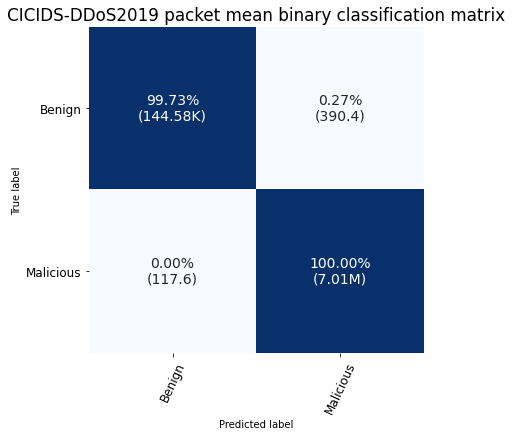

In [14]:
#Plot confusion matrix
import seaborn as sns
#labels = ['Benign','Malicious']

#Standard heatmap
cf_norm = cf/cf.sum(axis=1)[:,None]
cf_percentages = ["{0:.2%}".format(value) for value in cf_norm.flatten()]
cf_numbers = [abbrv_num(value) for value in cf.flatten()]
cf_labels = ['{v1}\n({v2})'.format(v1=v1, v2=v2) for v1,v2 in zip(cf_percentages,cf_numbers)]
cf_labels = np.asarray(cf_labels).reshape(cf.shape)

fig, ax = plt.subplots(figsize=(6, 6))
plt.rc('font', size=14)
column_labels = sorted(y_test.unique())
#column_labels[6] = 'Benign'
column_labels = ['Benign', 'Malicious']
sns.heatmap(cf_norm, annot=cf_labels, fmt='',cmap='Blues',cbar=False, vmin=0.0, vmax=1.0, ax=ax, xticklabels=column_labels, yticklabels=column_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation='0', size='12')
plt.xticks(rotation='65', size='12')
plt.title("CICIDS-DDoS2019 packet mean binary classification matrix")
plt.savefig('ddos2019_packet_binaryclass_cf.png',bbox_inches='tight')
plt.show()

In [19]:
#Visualize single tree of random forest
# Extract single tree
estimator = rf_clf.estimators_[20]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = df[label].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

OSError: [Errno 12] Cannot allocate memory

## Hyperparameter grid search

In [6]:
import itertools
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
fold_val_bacc = []
for train_idx, test_idx in skf.split(df[features], df['Label']):
    #Split train into train/val
    split_idx = math.floor(len(train_idx)*0.75)
    val_idx = train_idx[split_idx:]
    train_idx = train_idx[:split_idx]
    print("TRAIN:", len(train_idx), "VAL:", len(val_idx), "TEST:", len(test_idx))
    #Get train / val / test split data
    X_train = df[features].iloc[train_idx,:]
    X_val = df[features].iloc[val_idx,:]
    #X_test = df[features].iloc[test_idx,:]
    y_train = df[label].iloc[train_idx]
    y_val = df[label].iloc[val_idx]
    #y_test = df[label].iloc[test_idx]
    #Apply Random Forest
    measure_search = ['gini','entropy']
    size_search = [1,5,10,25,50,100]
    msamples_search = [0.7, 0.8, 0.9]
    val_bacc_scores = list()
    for (c, n, maxs) in [(c, n, maxs) for c in measure_search for n in size_search for maxs in msamples_search]:
        print("Working on grid: ", c, n, maxs)
        clf = RandomForestClassifier(n_estimators=n,min_samples_split=10,min_samples_leaf=5,max_samples=maxs,criterion=c,n_jobs=5)
        clf.fit(X_train,y_train)
        print("Finished building random forest")
        #evaluate on val
        yval_pred = clf.predict(X_val)
        val_bacc = balanced_accuracy_score(y_val,yval_pred)
        val_bacc_scores.append(val_bacc)
        #Print progress
        print('{%s,%.1f,%.1f} val: %.3f' % (c, n, maxs, val_bacc))
    #fold_train_bacc.append(train_bacc_scores)
    fold_val_bacc.append(val_bacc_scores)

TRAIN: 21466173 VAL: 7155391 TEST: 7155391
Working on grid:  gini 1 0.7
Finished building random forest
{gini,1.0,0.7} val: 0.998
Working on grid:  gini 1 0.8
Finished building random forest
{gini,1.0,0.8} val: 0.998
Working on grid:  gini 1 0.9
Finished building random forest
{gini,1.0,0.9} val: 0.998
Working on grid:  gini 5 0.7
Finished building random forest
{gini,5.0,0.7} val: 0.998
Working on grid:  gini 5 0.8
Finished building random forest
{gini,5.0,0.8} val: 0.998
Working on grid:  gini 5 0.9
Finished building random forest
{gini,5.0,0.9} val: 0.998
Working on grid:  gini 10 0.7
Finished building random forest
{gini,10.0,0.7} val: 0.998
Working on grid:  gini 10 0.8
Finished building random forest
{gini,10.0,0.8} val: 0.998
Working on grid:  gini 10 0.9
Finished building random forest
{gini,10.0,0.9} val: 0.998
Working on grid:  gini 25 0.7
Finished building random forest
{gini,25.0,0.7} val: 0.998
Working on grid:  gini 25 0.8
Finished building random forest
{gini,25.0,0.8} v

{gini,100.0,0.8} val: 0.999
Working on grid:  gini 100 0.9
Finished building random forest
{gini,100.0,0.9} val: 0.999
Working on grid:  entropy 1 0.7
Finished building random forest
{entropy,1.0,0.7} val: 0.999
Working on grid:  entropy 1 0.8
Finished building random forest
{entropy,1.0,0.8} val: 0.999
Working on grid:  entropy 1 0.9
Finished building random forest
{entropy,1.0,0.9} val: 0.999
Working on grid:  entropy 5 0.7
Finished building random forest
{entropy,5.0,0.7} val: 0.999
Working on grid:  entropy 5 0.8
Finished building random forest
{entropy,5.0,0.8} val: 0.999
Working on grid:  entropy 5 0.9
Finished building random forest
{entropy,5.0,0.9} val: 0.998
Working on grid:  entropy 10 0.7
Finished building random forest
{entropy,10.0,0.7} val: 0.999
Working on grid:  entropy 10 0.8
Finished building random forest
{entropy,10.0,0.8} val: 0.999
Working on grid:  entropy 10 0.9
Finished building random forest
{entropy,10.0,0.9} val: 0.999
Working on grid:  entropy 25 0.7
Finis

Finished building random forest
{entropy,100.0,0.7} val: 0.999
Working on grid:  entropy 100 0.8
Finished building random forest
{entropy,100.0,0.8} val: 0.999
Working on grid:  entropy 100 0.9
Finished building random forest
{entropy,100.0,0.9} val: 0.999


In [7]:
a = np.mean(fold_val_bacc,axis=0)
print(a.reshape(2,6,3))

[[[0.99823824 0.99835993 0.99836867]
  [0.99836504 0.99836985 0.99837448]
  [0.99838799 0.99838449 0.99837757]
  [0.9983823  0.99837945 0.99838168]
  [0.99838174 0.99838463 0.99837946]
  [0.99838221 0.9983794  0.99837946]]

 [[0.99829516 0.99824389 0.99829398]
  [0.99838268 0.99837883 0.99829643]
  [0.99836838 0.9983823  0.99837546]
  [0.99838098 0.9983794  0.99837628]
  [0.99838221 0.99837946 0.99837946]
  [0.9983823  0.99838236 0.9983794 ]]]


# SYN count analysis: feature not important even though SYN flood is biggest class

In [6]:
df['Label'].value_counts()

Syn        17303910
UDP         7543949
MSSQL       6450842
NetBIOS     3026287
BENIGN       724828
Portmap      378210
LDAP         345151
UDPLag         3778
Name: Label, dtype: int64

17303910
243    12562006
64      4722120
49         8010
48         1564
54         1200
112        1154
51         1120
45         1024
50          844
47          804
244         716
52          672
113         648
55          640
116         630
242         172
229         120
44          108
241          48
63           42
240          40
238          38
239          18
53           16
228          16
114          14
230          14
245          12
236          12
38           10
46            8
117           6
232           6
234           6
235           6
237           6
246           4
111           4
106           4
108           4
109           4
120           4
105           2
231           2
43            2
42            2
41            2
233           2
2             2
1             2
Name: Frame TTL, dtype: int64


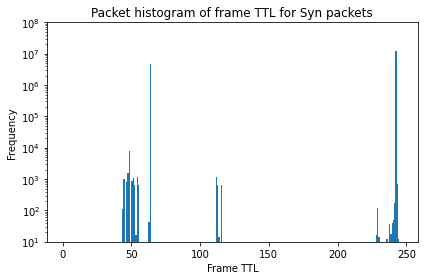

In [22]:
print(len(df.loc[df['Label'] == 'Syn']['Frame TTL']))
print(df.loc[df['Label'] == 'Syn']['Frame TTL'].value_counts())
df.loc[df['Label'] == 'Syn']['Frame TTL'].plot.hist(bins=(df['Frame TTL'].max()), ylim=(0,100000000), logy=True, stacked=True)
plt.xlabel('Frame TTL')
plt.ylim((10, 10**8))
plt.title('Packet histogram of frame TTL for Syn packets')
plt.tight_layout()
#plt.savefig('ddos2019_packet_hist_framettl_class.png',bbox_inches='tight')
plt.show()

17303910
40     17267757
52         9985
58         7174
120        3463
136        2076
         ...   
238           2
447           2
336           2
111           2
188           2
Name: Frame length, Length: 73, dtype: int64


/home/arjen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


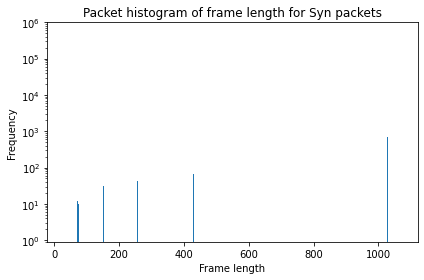

In [21]:
print(len(df.loc[df['Label'] == 'Syn']['Frame length']))
print(df.loc[df['Label'] == 'Syn']['Frame length'].value_counts())
df.loc[df['Label'] == 'Syn']['Frame length'].plot.hist(bins=(df['Frame length'].max()), ylim=(0,100000), logy=True, stacked=True)
plt.xlabel('Frame length')
plt.ylim((0, 10**6))
plt.title('Packet histogram of frame length for Syn packets')
plt.tight_layout()
#plt.savefig('ddos2019_packet_hist_framelength_class.png',bbox_inches='tight')
plt.show()